In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

/Users/zhongzhiyu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/zhongzhiyu/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
prop_df = pd.read_csv("/Users/zhongzhiyu/Downloads/big data project/properties_2016.csv")
prop_df.shape
# prop_df.head()

/Users/zhongzhiyu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

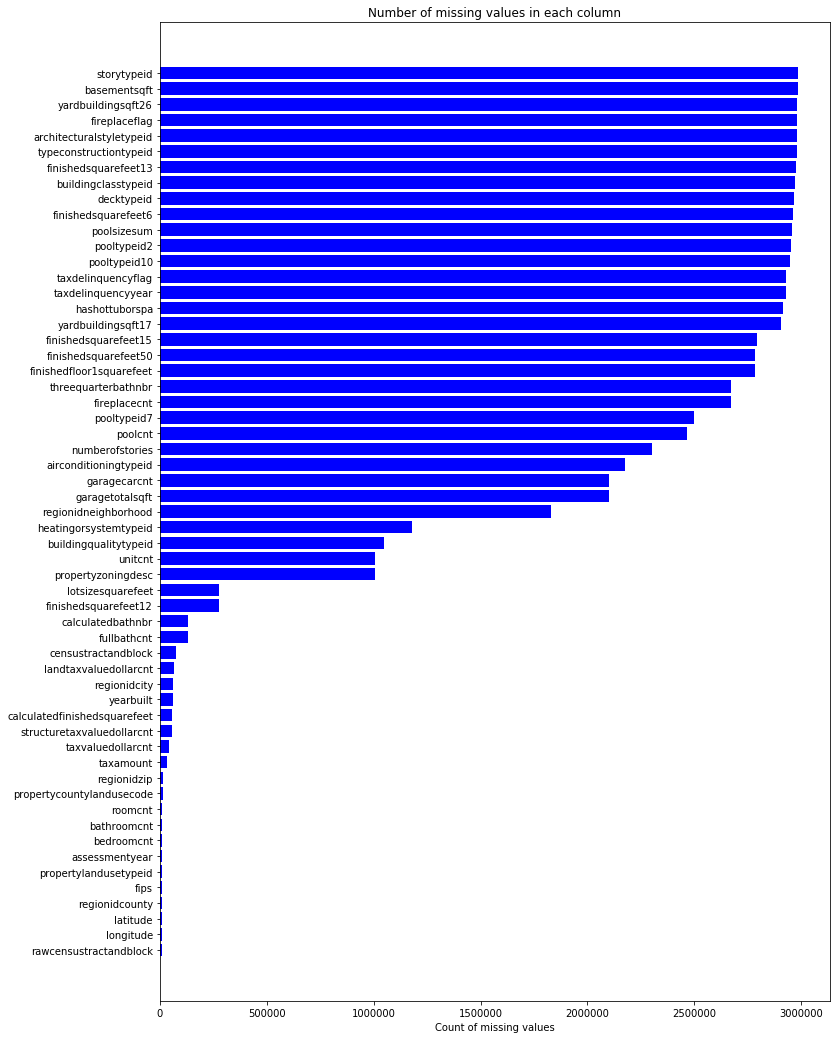

In [3]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
#width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

deal with missing columns

In [4]:
# storytypeid -->  Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.)
print prop_df['storytypeid'].describe()

#consider there are no special type in the missing colunms, so making the value as 0
prop_df.loc[prop_df["storytypeid"].isnull(),"storytypeidC"] = 0



count    1624.0
mean        7.0
std         0.0
min         7.0
25%         7.0
50%         7.0
75%         7.0
max         7.0
Name: storytypeid, dtype: float64


In [5]:
# basementsqft --> size of basement
print prop_df['basementsqft'].describe()
# consider there are just no basement in the house
prop_df.loc[prop_df["basementsqft"].isnull(),"basementsqft"] = 0

count    1628.000000
mean      646.883292
std       538.793473
min        20.000000
25%       272.000000
50%       534.000000
75%       847.250000
max      8516.000000
Name: basementsqft, dtype: float64


In [6]:
# yardbuildingsqft26 --> Storage shed/building in yard
print prop_df['yardbuildingsqft26'].describe()
# also consider there are no yard/storage
prop_df.loc[prop_df["yardbuildingsqft26"].isnull(),"yardbuildingsqft26"] = 0

count    2647.000000
mean      278.296562
std       369.731508
min        10.000000
25%        96.000000
50%       168.000000
75%       320.000000
max      6141.000000
Name: yardbuildingsqft26, dtype: float64


In [7]:
# fireplaceflag -->  Is a fireplace present in this home 
print prop_df['fireplaceflag'].describe()
if prop_df['fireplaceflag'].any() == 'False':
    print 1
# there are no value False in this type, so making the missing column as false
prop_df.loc[prop_df['fireplaceflag'].isnull(),'fireplaceflag'] = 'False'
# 'fireplacecnt' -->  Number of fireplaces in a home (if any)
print prop_df['fireplacecnt'].describe()
prop_df.loc[prop_df['fireplacecnt'].isnull(),'fireplacecnt'] = 0

count     5163
unique       1
top       True
freq      5163
Name: fireplaceflag, dtype: object
count    312637.000000
mean          1.168710
std           0.461273
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: fireplacecnt, dtype: float64


In [8]:
# 'architecturalstyletypeid'-->  Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
print prop_df['architecturalstyletypeid'].describe()
# the missing value may means that there are no specific style in the house. Create a new one meaning 'no specific' 
# and represent it with 0
prop_df.loc[prop_df['architecturalstyletypeid'].isnull(),'architecturalstyletypeid'] = 0

count    6061.000000
mean        7.202607
std         2.436290
min         2.000000
25%         7.000000
50%         7.000000
75%         7.000000
max        27.000000
Name: architecturalstyletypeid, dtype: float64


In [9]:
# 'typeconstructiontypeid' -->  What type of construction material was used to construct the home
print prop_df['typeconstructiontypeid'].describe()
# 6 is the most value, so represent it with 6
prop_df.loc[prop_df['architecturalstyletypeid'].isnull(),'architecturalstyletypeid'] = 6

count    6747.000000
mean        5.999555
std         0.384050
min         4.000000
25%         6.000000
50%         6.000000
75%         6.000000
max        13.000000
Name: typeconstructiontypeid, dtype: float64


In [10]:
# 'finishedsquarefeet13' --> Perimeter  living area
print prop_df['finishedsquarefeet13'].describe()
# this value seems don't have much to do with the house price, so we just drop this column
# same for other finishedsquarefeet values
# just have the finishedsquarefeet15 which means total area
print prop_df['finishedsquarefeet15'].describe()
print prop_df['finishedsquarefeet12'].describe()
prop_df.loc[prop_df['finishedsquarefeet15'].isnull(),'finishedsquarefeet15'] = 2740
prop_df.loc[prop_df['finishedsquarefeet15'].isnull(),'finishedsquarefeet15'] = 176

count    7672.000000
mean     1178.900678
std       357.073036
min       120.000000
25%       960.000000
50%      1296.000000
75%      1440.000000
max      2688.000000
Name: finishedsquarefeet13, dtype: float64
count    190798.000000
mean       2739.187235
std        5447.428327
min         112.000000
25%        1694.000000
50%        2172.000000
75%        2976.000000
max      820242.000000
Name: finishedsquarefeet15, dtype: float64
count    2.709184e+06
mean     1.760001e+03
std      9.710610e+02
min      1.000000e+00
25%      1.196000e+03
50%      1.539000e+03
75%      2.070000e+03
max      2.903450e+05
Name: finishedsquarefeet12, dtype: float64


In [11]:
# 'buildingclasstypeid' --> The building framing type (steel frame, wood frame, concrete/brick) 
print prop_df['buildingclasstypeid'].describe()
# also seems nothing to do with price, drop it

count    12629.000000
mean         3.725948
std          0.501700
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: buildingclasstypeid, dtype: float64


In [12]:
# 'decktypeid' --> Type of deck (if any) present on parcel
print prop_df['decktypeid'].describe()
# since it mentioned that there need to have a deck if there is a value, so for missing values, use 0 to represent
prop_df.loc[prop_df['decktypeid'].isnull(),'decktypeid'] = 0

count    17096.0
mean        66.0
std          0.0
min         66.0
25%         66.0
50%         66.0
75%         66.0
max         66.0
Name: decktypeid, dtype: float64


In [13]:
# for pool relevant value
print prop_df['poolcnt'].describe()
prop_df.loc[prop_df['poolcnt'].isnull(),'poolcnt'] = 0
print prop_df['poolsizesum'].describe()
# for missing data, consider it is just hot tub or spa, so the size is 0
prop_df.loc[prop_df['poolsizesum'].isnull(),'poolsizesum'] = 0

count    517534.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: poolcnt, dtype: float64
count    27960.000000
mean       519.710980
std        191.323284
min         19.000000
25%        430.000000
50%        495.000000
75%        594.000000
max      17410.000000
Name: poolsizesum, dtype: float64


In [14]:
# value about the unpaid tax can be solved by consider the tax is 0. 
print prop_df['taxdelinquencyflag'].describe()
prop_df.loc[prop_df['taxdelinquencyflag'].isnull(),'taxdelinquencyflag'] = 'N'
# drop the column about the tax due year. 

count     56462
unique        1
top           Y
freq      56462
Name: taxdelinquencyflag, dtype: object


In [15]:
# 'hashottuborspa' --> with/without hot spa
print prop_df['hashottuborspa'].describe()
# missing means no 
prop_df.loc[prop_df['hashottuborspa'].isnull(),'hashottuborspa'] = 'False'

count     69014
unique        1
top        True
freq      69014
Name: hashottuborspa, dtype: object


In [16]:
# 'yardbuildingsqft17' --> patio in yard
print prop_df['yardbuildingsqft17'].describe()
# missing means there are no patio
prop_df.loc[prop_df['yardbuildingsqft17'].isnull(),'yardbuildingsqft17'] = 0

count    80355.000000
mean       319.803397
std        233.086314
min         10.000000
25%        190.000000
50%        270.000000
75%        390.000000
max       7983.000000
Name: yardbuildingsqft17, dtype: float64


In [17]:
# 'threequarterbathnbr' -->  Number of 3/4 bathrooms in house (shower + sink + toilet)
print prop_df['threequarterbathnbr'].describe()
# since the majority value of this variable is 1 and the minimum value is also 1. So assume that the missing value
# is 0, which means that there are no such bathroom. 
prop_df.loc[prop_df['threequarterbathnbr'].isnull(),'threequarterbathnbr'] = 0

count    311631.000000
mean          1.010009
std           0.117709
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: threequarterbathnbr, dtype: float64


In [18]:
# 'numberofstories' -->  Number of stories or levels the home has
print prop_df['numberofstories'].describe()
# for missing data, assume that the story is 0
prop_df.loc[prop_df['numberofstories'].isnull(),'numberofstories'] = 0

count    682069.000000
mean          1.401464
std           0.539076
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          41.000000
Name: numberofstories, dtype: float64


In [19]:
# 'airconditioningtypeid' -->  Type of cooling system present in the home (if any)
print prop_df['airconditioningtypeid'].describe()
# 0 for no airconditioning
prop_df.loc[prop_df['airconditioningtypeid'].isnull(),'airconditioningtypeid'] = 0

count    811519.000000
mean          1.931166
std           3.148587
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          13.000000
Name: airconditioningtypeid, dtype: float64


In [20]:
# for garage relavant variables, fill it with 0 as no garage. 
prop_df.loc[prop_df['garagecarcnt'].isnull(),'garagecarcnt'] = 0
prop_df.loc[prop_df['garagetotalsqft'].isnull(),'garagetotalsqft'] = 0

In [21]:
# for region related variables, 
prop_df['regionidzip'].describe
# prop_df.drop(prop_df['regionidzip'].isnull().all(),inplace=True)
miss = prop_df['regionidzip'].isnull().sum(axis=0)
print miss

13980


In [22]:
# 'heatingorsystemtypeid' -->  Type of home heating system
print prop_df['heatingorsystemtypeid'].describe()
prop_df.loc[prop_df['heatingorsystemtypeid'].isnull(),'heatingorsystemtypeid'] = 0.0

count    1.806401e+06
mean     4.012053e+00
std      3.293733e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      7.000000e+00
max      2.400000e+01
Name: heatingorsystemtypeid, dtype: float64


In [23]:
# 'buildingqualitytypeid' -->  Overall assessment of condition of the building from best (lowest) to worst (highest)
print prop_df['buildingqualitytypeid'].describe()
# use the medium condition for missing data
prop_df.loc[prop_df['buildingqualitytypeid'].isnull(),'buildingqualitytypeid'] = 7.0

count    1.938488e+06
mean     5.784787e+00
std      1.805352e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      7.000000e+00
max      1.200000e+01
Name: buildingqualitytypeid, dtype: float64


In [24]:
# 'unitcnt' -->  Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
print prop_df['unitcnt'].describe()
# for missing data, use 0
prop_df.loc[prop_df['unitcnt'].isnull(),'unitcnt'] = 0


count    1.977490e+06
mean     1.181171e+00
std      2.447896e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.970000e+02
Name: unitcnt, dtype: float64


In [25]:
# 'propertyzoningdesc' -->  Description of the allowed land uses (zoning) for that property
print prop_df['propertyzoningdesc'].describe()
# drop this column

count     1978629
unique       5638
top          LAR1
freq       275029
Name: propertyzoningdesc, dtype: object


In [26]:
# 'lotsizesquarefeet' -->  Area of the lot in square feet
print prop_df['lotsizesquarefeet'].describe()
# no lot for missing data
prop_df.loc[prop_df['lotsizesquarefeet'].isnull(),'lotsizesquarefeet'] = 0

count    2.709118e+06
mean     2.282281e+04
std      3.375924e+05
min      1.000000e+02
25%      5.688000e+03
50%      7.000000e+03
75%      9.898000e+03
max      3.282638e+08
Name: lotsizesquarefeet, dtype: float64


In [27]:
# 'calculatedbathnbr' -->  Number of bathrooms in home including fractional bathroom
print prop_df['calculatedbathnbr'].describe()
# no lot for missing data
prop_df.loc[prop_df['calculatedbathnbr'].isnull(),'calculatedbathnbr'] = 0
# 'fullbathcnt' -->  Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
print prop_df['fullbathcnt'].describe()
# no lot for missing data
prop_df.loc[prop_df['fullbathcnt'].isnull(),'fullbathcnt'] = 0

count    2.856305e+06
mean     2.299263e+00
std      1.000736e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      2.000000e+01
Name: calculatedbathnbr, dtype: float64
count    2.856305e+06
mean     2.244165e+00
std      9.912054e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      2.000000e+01
Name: fullbathcnt, dtype: float64


In [28]:
# drop census related data
# landtaxvaluedollarcnt' --> The assessed value of the land area of the parcel
print prop_df['landtaxvaluedollarcnt'].describe()
prop_df.loc[prop_df['landtaxvaluedollarcnt'].isnull(),'landtaxvaluedollarcnt'] = 252478.0

count    2.917484e+06
mean     2.524780e+05
std      4.450132e+05
min      1.000000e+00
25%      7.483600e+04
50%      1.670420e+05
75%      3.069180e+05
max      9.024622e+07
Name: landtaxvaluedollarcnt, dtype: float64


In [29]:
# yearbuilt -->  The Year the principal residence was built 
print prop_df['yearbuilt'].describe()
prop_df.loc[prop_df['yearbuilt'].isnull(),'yearbuilt'] = 1964

count    2.925289e+06
mean     1.964262e+03
std      2.344132e+01
min      1.801000e+03
25%      1.950000e+03
50%      1.963000e+03
75%      1.981000e+03
max      2.015000e+03
Name: yearbuilt, dtype: float64


In [30]:
# 'calculatedfinishedsquarefeet' -->  Calculated total finished living area of the home 
print prop_df['calculatedfinishedsquarefeet'].describe()
# remove row if missing

count    2.929652e+06
mean     1.827162e+03
std      1.819780e+03
min      1.000000e+00
25%      1.213000e+03
50%      1.572000e+03
75%      2.136000e+03
max      9.525760e+05
Name: calculatedfinishedsquarefeet, dtype: float64


In [31]:
# structuretaxvaluedollarcnt' --> The assessed value of the built structure on the parcel
print prop_df['structuretaxvaluedollarcnt'].describe()
prop_df.loc[prop_df['structuretaxvaluedollarcnt'].isnull(),'structuretaxvaluedollarcnt'] = 170883
# taxvaluedollarcnt' --> The total tax assessed value of the parcel
print prop_df['taxvaluedollarcnt'].describe()
prop_df.loc[prop_df['taxvaluedollarcnt'].isnull(),'taxvaluedollarcnt'] = 420479

count    2.930235e+06
mean     1.708836e+05
std      4.020683e+05
min      1.000000e+00
25%      7.480000e+04
50%      1.225900e+05
75%      1.968890e+05
max      2.514860e+08
Name: structuretaxvaluedollarcnt, dtype: float64
count    2.942667e+06
mean     4.204790e+05
std      7.263467e+05
min      1.000000e+00
25%      1.796750e+05
50%      3.060860e+05
75%      4.880000e+05
max      2.827860e+08
Name: taxvaluedollarcnt, dtype: float64


In [32]:
# 'taxamount' --> The total property tax assessed for that assessment year
print prop_df['taxamount'].describe()
prop_df.loc[prop_df['taxamount'].isnull(),'taxamount'] = 5377

count    2.953967e+06
mean     5.377607e+03
std      9.183107e+03
min      1.340000e+00
25%      2.461070e+03
50%      3.991780e+03
75%      6.201005e+03
max      3.458861e+06
Name: taxamount, dtype: float64


In [33]:
# 'propertylandusetypeid' -->  Type of land use the property is zoned for
print prop_df['propertylandusetypeid'].describe()
prop_df.loc[prop_df['propertylandusetypeid'].isnull(),'propertylandusetypeid'] = 261

count    2.973780e+06
mean     2.600484e+02
std      1.590817e+01
min      3.100000e+01
25%      2.610000e+02
50%      2.610000e+02
75%      2.610000e+02
max      2.750000e+02
Name: propertylandusetypeid, dtype: float64


In [34]:
# roomcnt -->  Total number of rooms in the principal residence
print prop_df['bathroomcnt'].describe()
prop_df.loc[prop_df['bathroomcnt'].isnull(),'bathroomcnt'] = 0
print prop_df['bedroomcnt'].describe()
prop_df.loc[prop_df['bedroomcnt'].isnull(),'bedroomcnt'] = 0

count    2.973755e+06
mean     2.209143e+00
std      1.077754e+00
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      2.000000e+01
Name: bathroomcnt, dtype: float64
count    2.973767e+06
mean     3.088949e+00
std      1.275859e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      2.000000e+01
Name: bedroomcnt, dtype: float64


In [35]:
# drop the rows that missing important data
prop_df = prop_df.drop(prop_df[prop_df['regionidzip'].isnull()].index)
prop_df = prop_df.drop(prop_df[prop_df['calculatedfinishedsquarefeet'].isnull()].index)
prop_df = prop_df.drop(prop_df[prop_df['latitude'].isnull()].index)
prop_df = prop_df.drop(prop_df[prop_df['longitude'].isnull()].index)

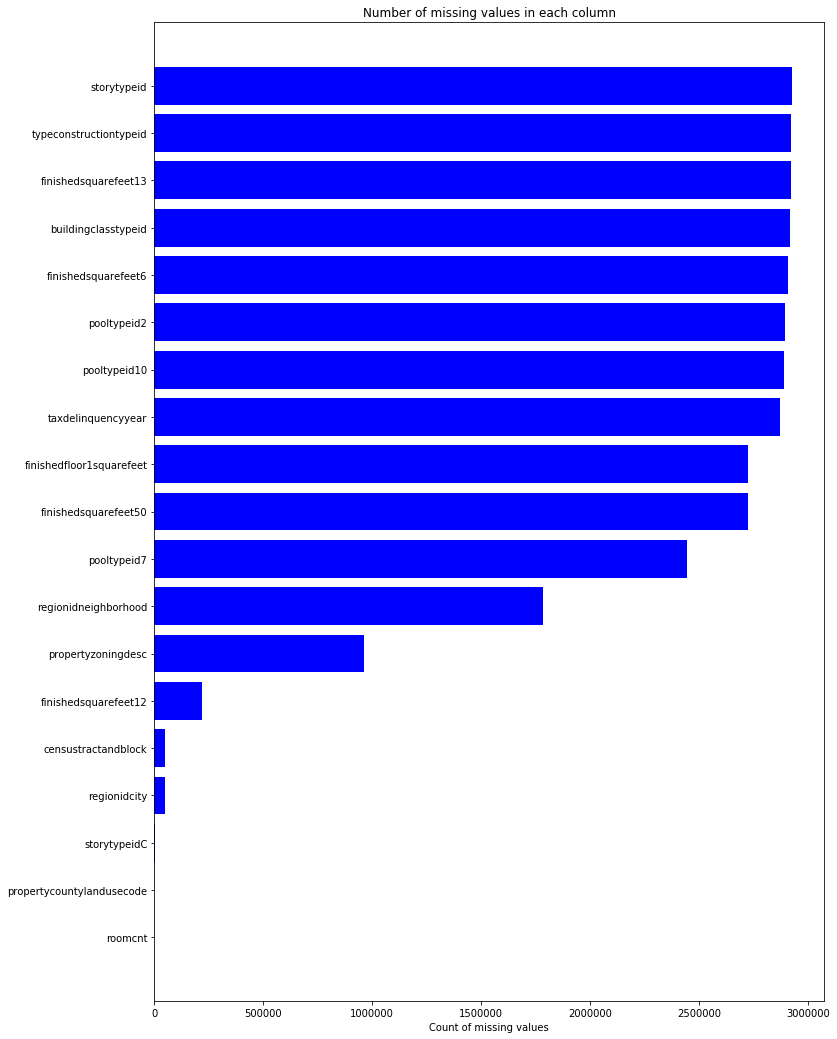

In [36]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
#width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [37]:
drop_col = [col for col in prop_df.columns 
                                 if prop_df[col].isnull().any()]
prop_df.drop(drop_col, axis=1, inplace = True)

In [38]:
missing_df = prop_df.isnull().sum(axis=0)
print missing_df

parcelid                        0
airconditioningtypeid           0
architecturalstyletypeid        0
basementsqft                    0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
decktypeid                      0
calculatedfinishedsquarefeet    0
finishedsquarefeet15            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
garagecarcnt                    0
garagetotalsqft                 0
hashottuborspa                  0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
poolsizesum                     0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcounty                  0
regionidzip                     0
threequarterbathnbr             0
unitcnt                         0
yardbuildingsq

In [39]:
# define the price of houses
print prop_df['landtaxvaluedollarcnt'].describe()
print prop_df['taxvaluedollarcnt'].describe()
print prop_df['structuretaxvaluedollarcnt'].describe()
prop_df_price = (prop_df['landtaxvaluedollarcnt'] + prop_df['taxvaluedollarcnt'] + prop_df['structuretaxvaluedollarcnt'])/3
print prop_df_price.describe()

count    2.928178e+06
mean     2.512834e+05
std      4.150618e+05
min      1.000000e+00
25%      7.643200e+04
50%      1.695960e+05
75%      3.049345e+05
max      7.649850e+07
Name: landtaxvaluedollarcnt, dtype: float64
count    2.928178e+06
mean     4.214789e+05
std      6.589711e+05
min      1.000000e+00
25%      1.849950e+05
50%      3.114650e+05
75%      4.870970e+05
max      2.827860e+08
Name: taxvaluedollarcnt, dtype: float64
count    2.928178e+06
mean     1.707211e+05
std      3.482250e+05
min      1.000000e+00
25%      7.640000e+04
50%      1.245800e+05
75%      1.960010e+05
max      2.514860e+08
Name: structuretaxvaluedollarcnt, dtype: float64
count    2.928178e+06
mean     2.811611e+05
std      4.392655e+05
min      6.000000e+00
25%      1.234420e+05
50%      2.076447e+05
75%      3.247413e+05
max      1.885240e+08
dtype: float64


In [40]:
# insert the value column
print prop_df.shape
prop_df.insert(40,"value",prop_df_price)
prop_df.drop("landtaxvaluedollarcnt", axis=1, inplace = True)
prop_df.drop('structuretaxvaluedollarcnt', axis=1, inplace = True)
prop_df.drop("taxvaluedollarcnt", axis=1, inplace = True)

(2928178, 40)


In [41]:
print prop_df.shape

(2928178, 38)


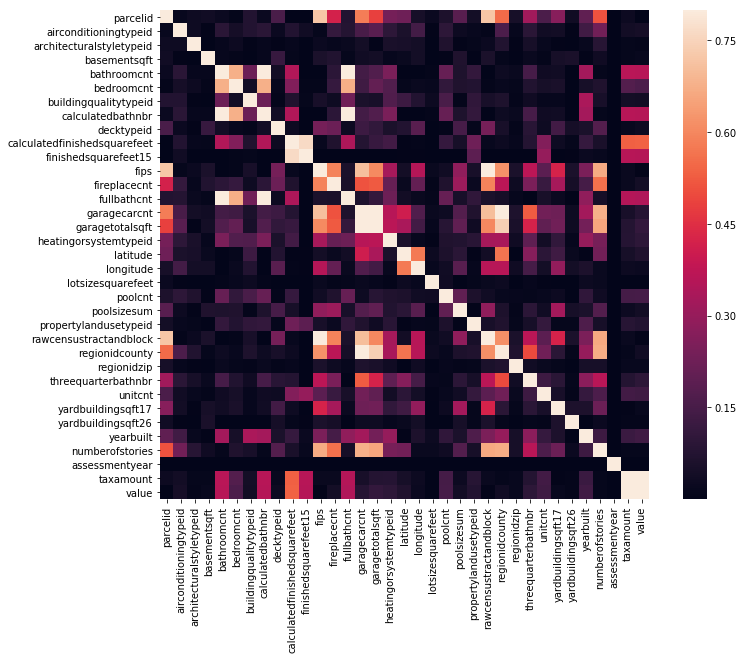

In [42]:
# correlation matrix
corrmat = abs(prop_df.corr())
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

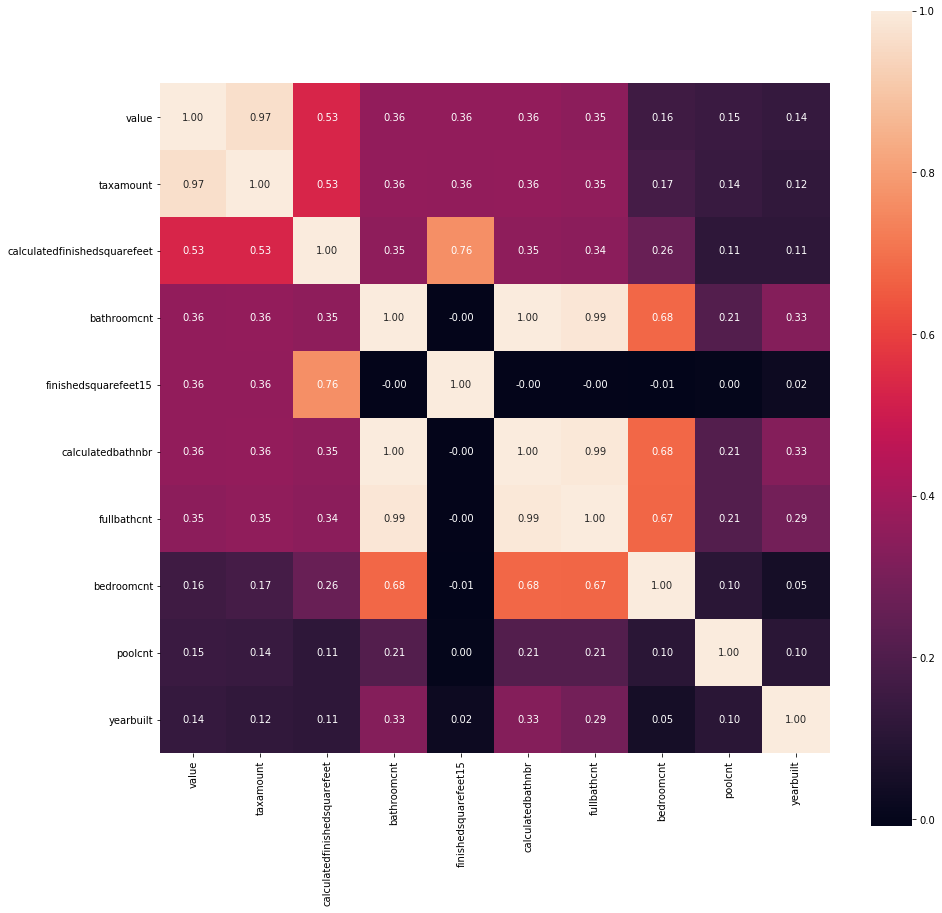

In [43]:
k = 10 
fig, ax = plt.subplots(figsize=(15,15))
Key_elements = corrmat.nlargest(k, 'value')['value'].index
importance = np.corrcoef(prop_df[Key_elements].values.T)
new_mat = sns.heatmap(importance, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=Key_elements.values, xticklabels=Key_elements.values, ax = ax)
plt.show()

In [44]:
# save the pre-processed data
# prop_df.to_csv("/Users/zhongzhiyu/Downloads/big data project/properties_2016_processed.csv")

# the following part is the data visulization part

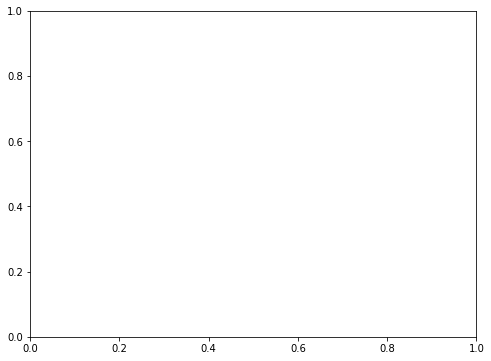

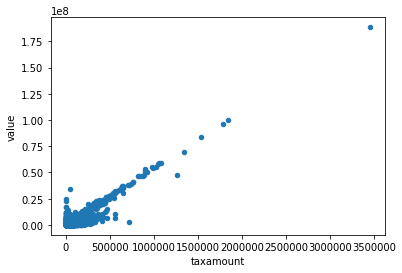

In [48]:
var = 'taxamount'
data = pd.concat([prop_df['value'], prop_df[var]], axis=1)
data.plot.scatter(x=var, y='value')

plt.show()

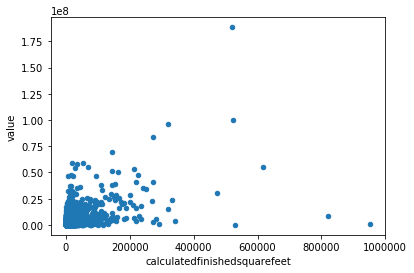

In [49]:
var = 'calculatedfinishedsquarefeet'
data = pd.concat([prop_df['value'], prop_df[var]], axis=1)
data.plot.scatter(x=var, y='value')

plt.show()

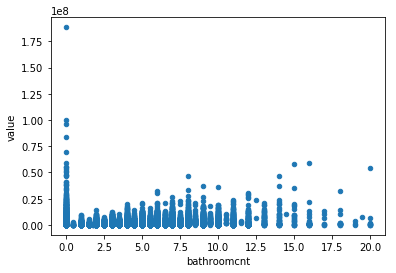

In [50]:
var = 'bathroomcnt'
data = pd.concat([prop_df['value'], prop_df[var]], axis=1)
data.plot.scatter(x=var, y='value')

plt.show()

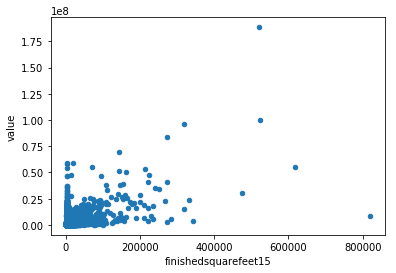

In [51]:
var = 'finishedsquarefeet15'
data = pd.concat([prop_df['value'], prop_df[var]], axis=1)
data.plot.scatter(x=var, y='value')

plt.show()

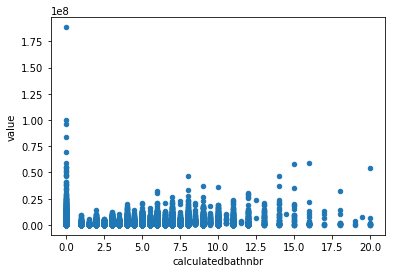

In [52]:
var = 'calculatedbathnbr'
data = pd.concat([prop_df['value'], prop_df[var]], axis=1)
data.plot.scatter(x=var, y='value')

plt.show()

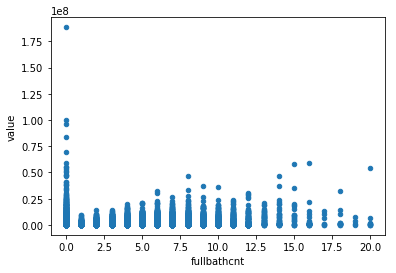

In [53]:
var = 'fullbathcnt'
data = pd.concat([prop_df['value'], prop_df[var]], axis=1)
data.plot.scatter(x=var, y='value')

plt.show()

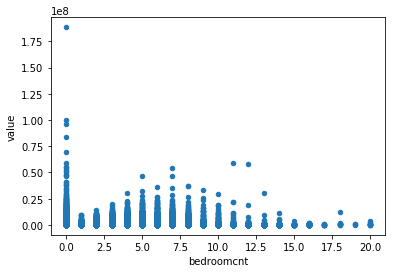

In [54]:
var = 'bedroomcnt'
data = pd.concat([prop_df['value'], prop_df[var]], axis=1)
data.plot.scatter(x=var, y='value')

plt.show()

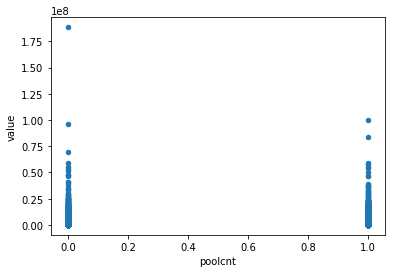

In [55]:
var = 'poolcnt'
data = pd.concat([prop_df['value'], prop_df[var]], axis=1)
data.plot.scatter(x=var, y='value')

plt.show()

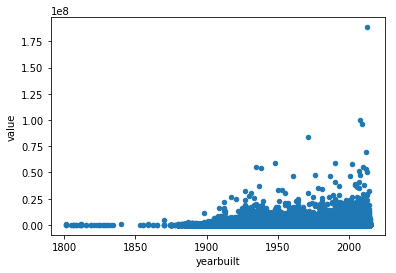

In [56]:
var = 'yearbuilt'
data = pd.concat([prop_df['value'], prop_df[var]], axis=1)
data.plot.scatter(x=var, y='value')

plt.show()

In [ ]:
sns.set()
cols = ['value', 'taxamount', 'calculatedfinishedsquarefeet', 'bathroomcnt', 'finishedsquarefeet15', 'calculatedbathnbr', 'fullbathcnt','bedroomcnt','poolcnt','yearbuilt']
sns.pairplot(prop_df[cols], size = 2.5)
plt.show();